# 1. Data Import & Cleaning

In [102]:
import pandas as pd

# Import the data
df = pd.read_csv("../classification/labelled_posts.csv")

# Drop reposts (i.e. engagement & comments = 0)
no_reposts_df = df[(df['engagement'] != 0) | (df['comments'] != 0)].copy()
no_reposts_df.head()

,content,engagement,comments,personal_exp,type
0,Sending an email newsletter is a lot like dati...,13,5,False,analytical
1,It is a great week to connect with people who ...,18,0,False,promotional
2,Here's an effective strategy for designing you...,282,5,False,actionable
3,There are 4 elements of selling and scaling an...,4,1,False,actionable
4,One of the biggest changes I’ve made this year...,56,2,True,aspirational


# 2. Data Visualization

/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyurikotpq/miniconda3/envs/ML_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

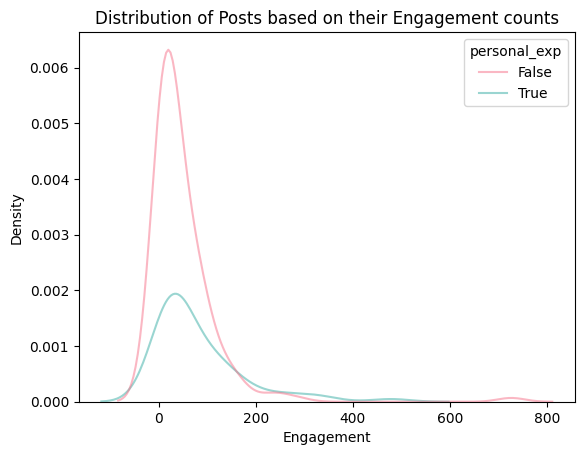

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(data = no_reposts_df, x = "engagement",
                hue="personal_exp", alpha=0.5, palette="husl")


plt.xlabel("Engagement")
plt.ylabel("Density")
plt.title("Distribution of Posts based on their Engagement counts")
plt.show()


# 3. Data Analysis

In [115]:
import numpy as np
from scipy.stats import mannwhitneyu

# Split the datasets
personal_df_eng = no_reposts_df[no_reposts_df["personal_exp"]]["engagement"]
non_personal_df_eng = no_reposts_df[no_reposts_df["personal_exp"]
                                    == False]["engagement"]

# Calculate the test statistic, U
personal_stat, p = mannwhitneyu(personal_df_eng, non_personal_df_eng)

nx, ny = personal_df_eng.shape[0], non_personal_df_eng.shape[0]
non_personal_stat = nx*ny - personal_stat

# #descriptivestats: Calculate mean and median
print("Post Engagement Statistics")
print("---------------------")
print("Personal posts:")
print("- Mean:", np.mean(personal_df_eng))
print("- Median:", np.median(personal_df_eng))
print("- U-Statistic:", personal_stat)
print("")
print("Non-Personal posts:", np.median(non_personal_df_eng))
print("- Mean:", np.mean(non_personal_df_eng))
print("- Median:", np.median(non_personal_df_eng))
print("- U-Statistic:", non_personal_stat)
print("")

# # Check the p-value
if p < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


Post Engagement Statistics
---------------------
Personal posts:
- Mean: 81.0909090909091
- Median: 44.5
- U-Statistic: 5963.0

Non-Personal posts: 25.0
- Mean: 49.62937062937063
- Median: 25.0
- U-Statistic: 3475.0

There is a statistically significant difference between the groups.
